In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [8]:
pd.crosstab(data.sex, data.target)

target,0,1
sex,,
0,86,226
1,413,300


In [9]:
data.shape

(1025, 14)

In [10]:
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [11]:
data["target"].unique()

array([0, 1], dtype=int64)

In [12]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [13]:
data["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
data["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [15]:
data["fbs"].unique()

array([0, 1], dtype=int64)

In [16]:
average_age = data['age'].mean()
print("Average age:", average_age)

Average age: 54.43414634146342


In [17]:
gender_distribution = data['sex'].value_counts()
print("Gender distribution:\n", gender_distribution)

Gender distribution:
 sex
1    713
0    312
Name: count, dtype: int64


In [18]:
high_blood_pressure_count = data[data['trestbps'] > 140].shape[0]
print("Number of individuals with resting blood pressure > 140:", high_blood_pressure_count)

Number of individuals with resting blood pressure > 140: 217


In [19]:
average_cholesterol_cp2 = data[data['cp'] == 2]['chol'].mean()
print("Average cholesterol level among individuals with chest pain type 2:", average_cholesterol_cp2)

Average cholesterol level among individuals with chest pain type 2: 242.19718309859155


In [20]:
max_heart_rate_fbs_gt_120 = data[data['fbs'] > 120]['thalach'].max()
print("Maximum heart rate achieved among individuals with fasting blood sugar > 120:", max_heart_rate_fbs_gt_120)

Maximum heart rate achieved among individuals with fasting blood sugar > 120: nan


In [21]:
high_oldpeak_exang_count = data[(data['exang'] == 1) & (data['oldpeak'] > 2)].shape[0]
print("Number of individuals with exang and oldpeak > 2:", high_oldpeak_exang_count)

Number of individuals with exang and oldpeak > 2: 106


In [22]:
slope_1_proportion = (data['slope'] == 1).mean() * 100
print("Proportion of individuals with slope equal to 1:", slope_1_proportion)

Proportion of individuals with slope equal to 1: 47.02439024390244


In [23]:
thal_type_2_count = data[data['thal'] == 2].shape[0]
print("Number of individuals with thal type 2:", thal_type_2_count)

Number of individuals with thal type 2: 544


In [24]:
target_1_proportion = (data['target'] == 1).mean() * 100
print("Proportion of individuals with target variable equal to 1:", target_1_proportion)

Proportion of individuals with target variable equal to 1: 51.31707317073171


In [25]:
# Select numeric columns for standardization or normalization
numeric_columns = ['age', 'trestbps']

In [26]:
# Standardization
scaler_standard = StandardScaler()
data_standardized = data.copy()
data_standardized[numeric_columns] = scaler_standard.fit_transform(data_standardized[numeric_columns])

In [27]:
# Normalization
scaler_minmax = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numeric_columns] = scaler_minmax.fit_transform(data_normalized[numeric_columns])

In [28]:
print("Standardized Data:")
print(data_standardized.head())

Standardized Data:
        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0 -0.268437    1   0 -0.377636   212    0        1      168      0      1.0   
1 -0.158157    1   0  0.479107   203    1        0      155      1      3.1   
2  1.716595    1   0  0.764688   174    0        1      125      1      2.6   
3  0.724079    1   0  0.936037   203    0        1      161      0      0.0   
4  0.834359    0   0  0.364875   294    1        1      106      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


In [29]:
print("Normalized Data:")
print(data_normalized.head())

Normalized Data:
        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  0.479167    1   0  0.292453   212    0        1      168      0      1.0   
1  0.500000    1   0  0.433962   203    1        0      155      1      3.1   
2  0.854167    1   0  0.481132   174    0        1      125      1      2.6   
3  0.666667    1   0  0.509434   203    0        1      161      0      0.0   
4  0.687500    0   0  0.415094   294    1        1      106      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


C:\Users\Haroon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


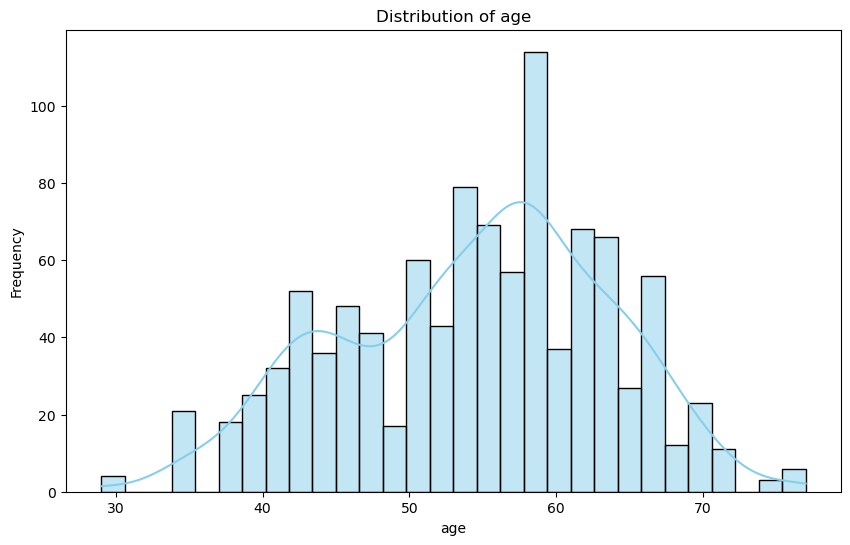

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True, bins=30, color='skyblue')
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Haroon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


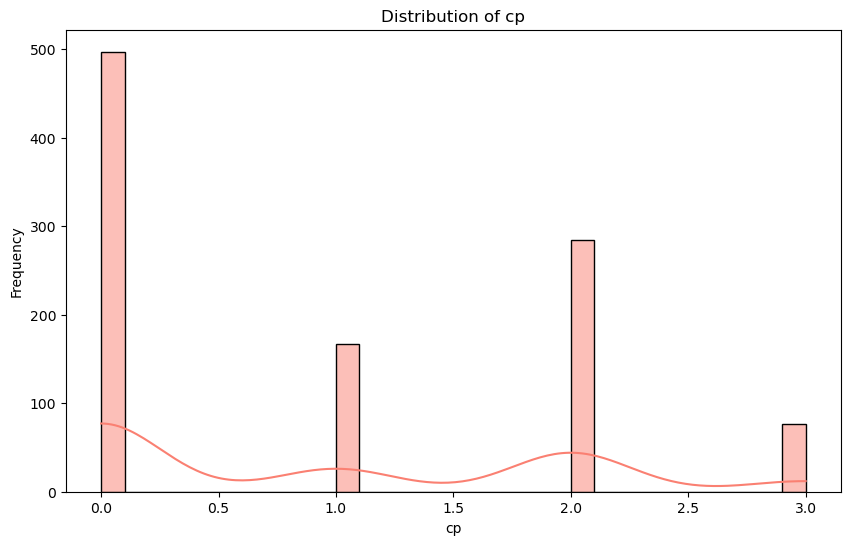

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='cp', kde=True, bins=30, color='salmon')
plt.title('Distribution of cp')
plt.xlabel('cp')
plt.ylabel('Frequency')
plt.show()

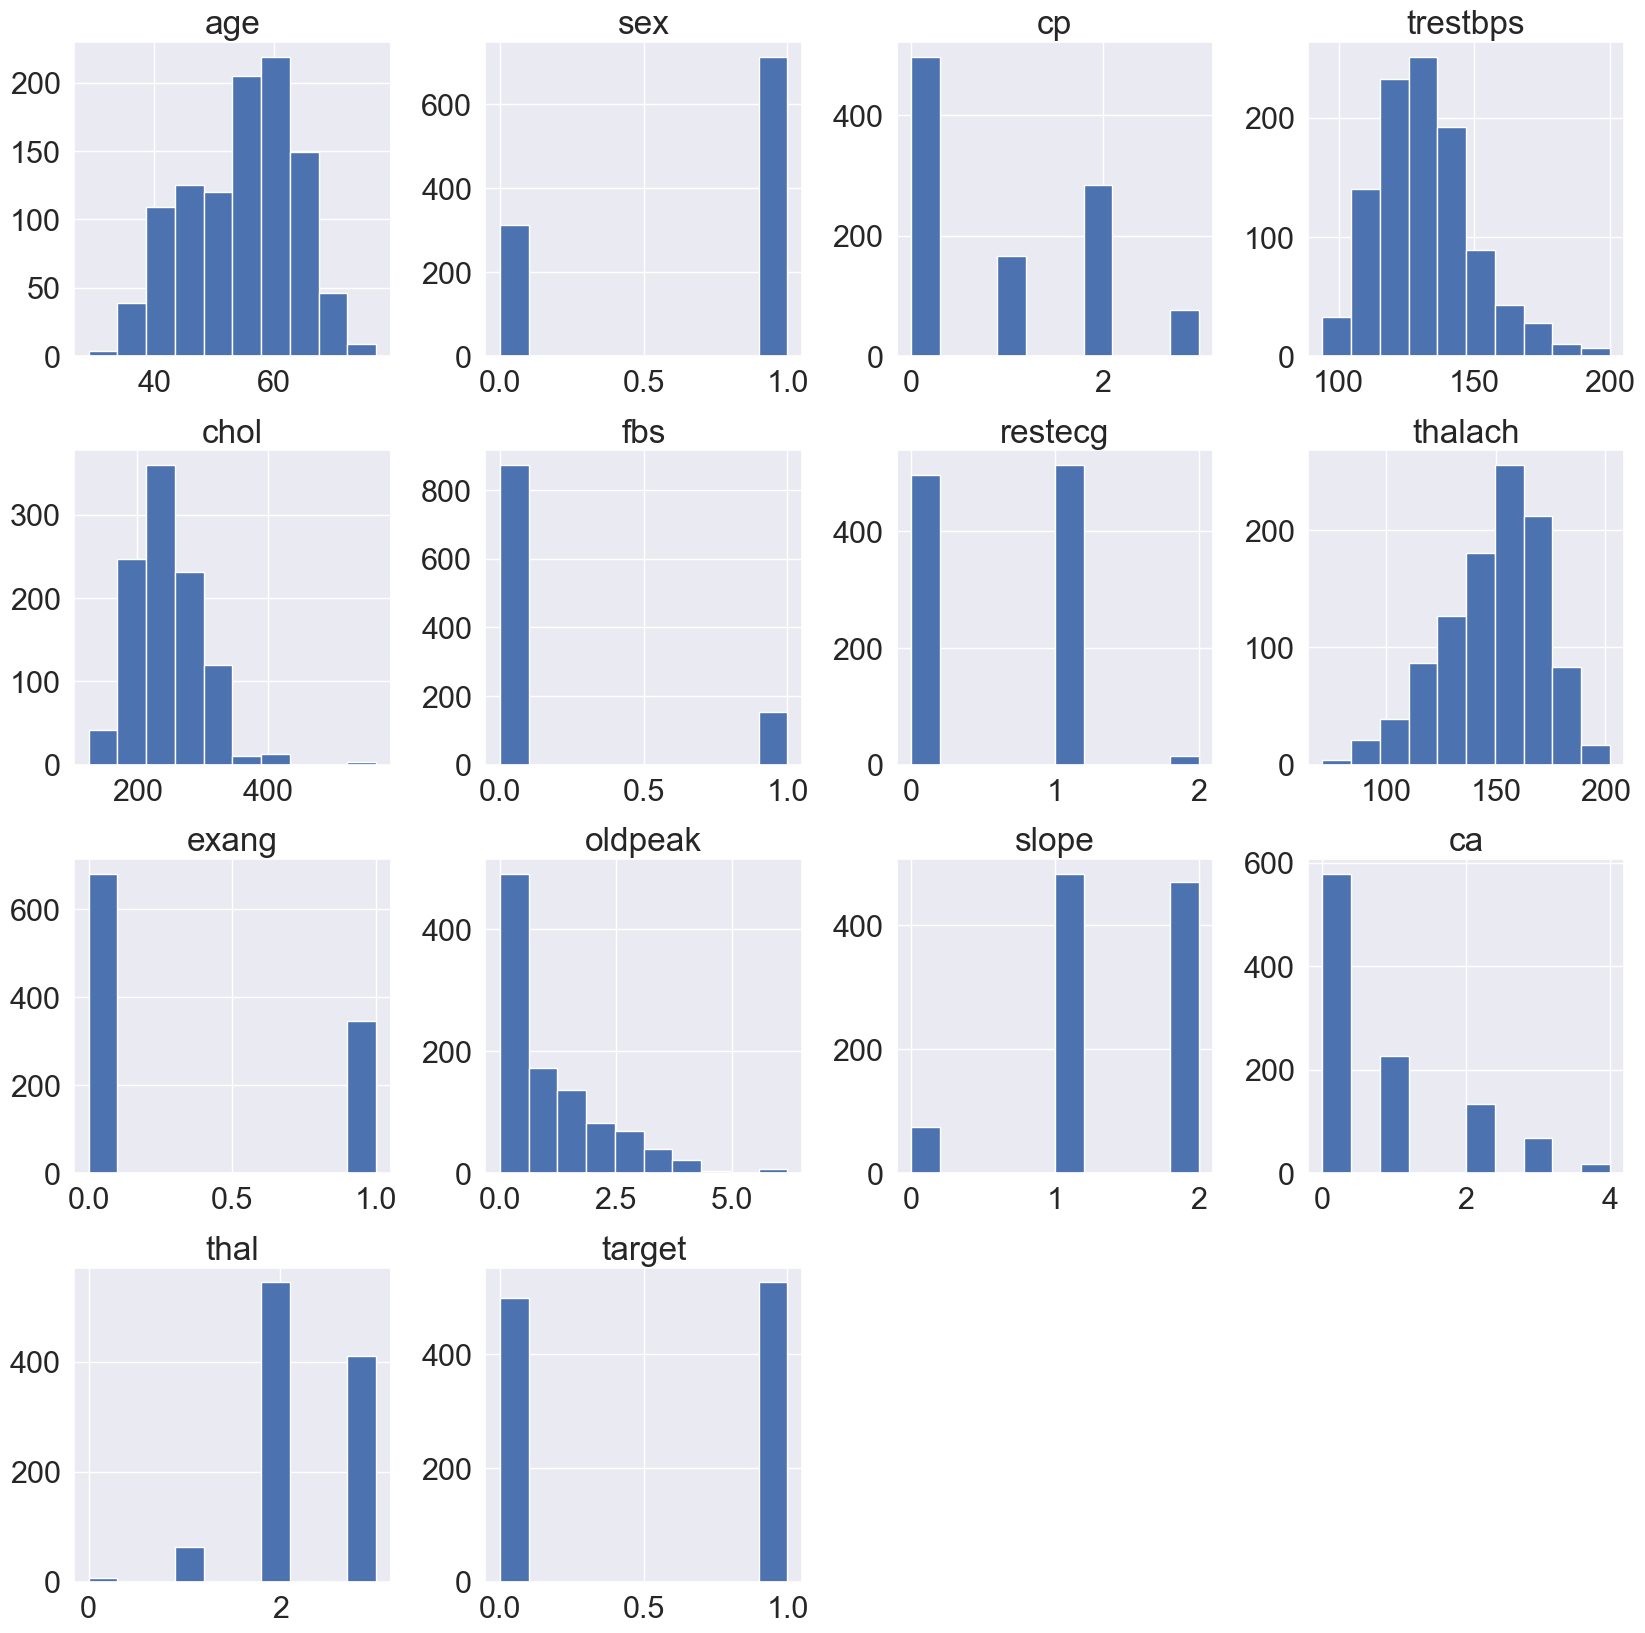

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
data.hist(figsize=(20,20))
plt.show()

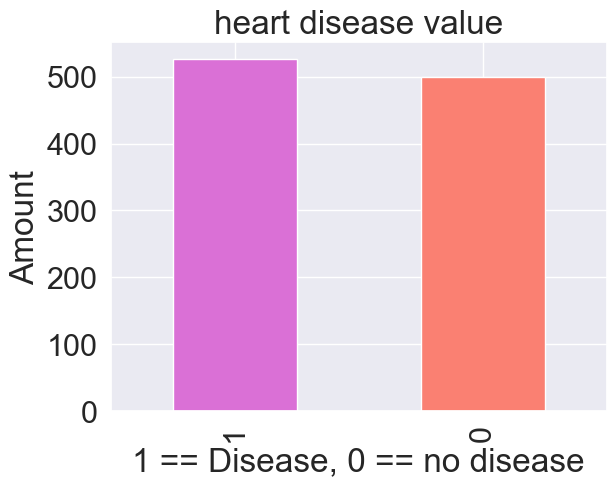

In [35]:
data.target.value_counts().plot(kind = 'bar', color = ['orchid', 'salmon'])
plt.title("heart disease value")
plt.xlabel("1 == Disease, 0 == no disease")
plt.ylabel("Amount")
plt.show()

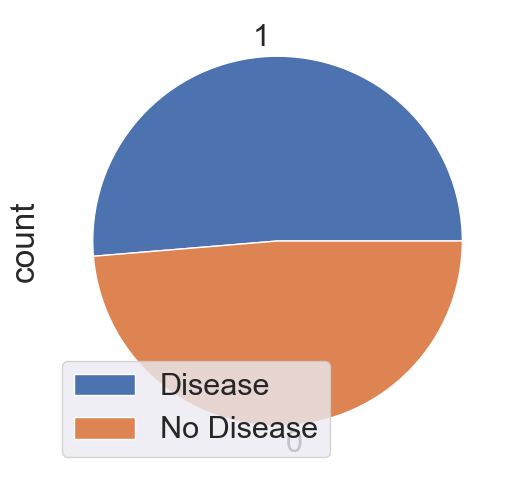

In [36]:
data.target.value_counts().plot(kind = 'pie',figsize = (10, 6))
plt.legend(["Disease", "No Disease"])
plt.show()

In [37]:
data.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

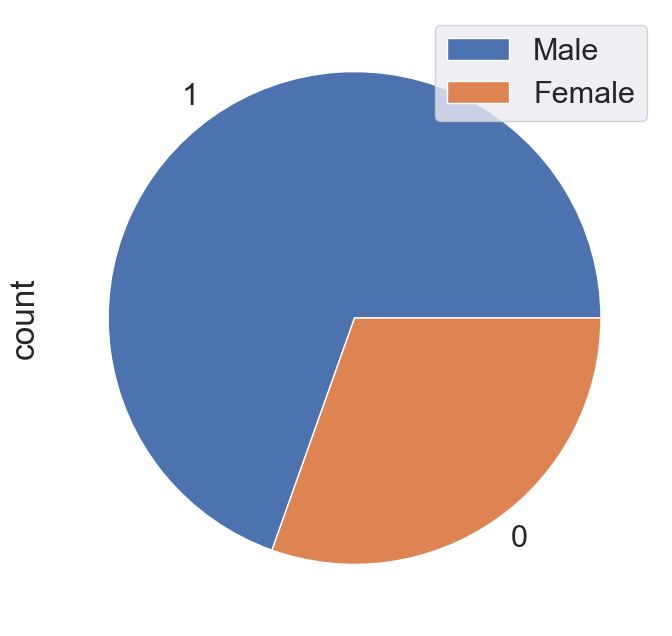

In [38]:
data.sex.value_counts().plot(kind = 'pie', figsize = (10, 8))
plt.legend(['Male', 'Female'])
plt.show()

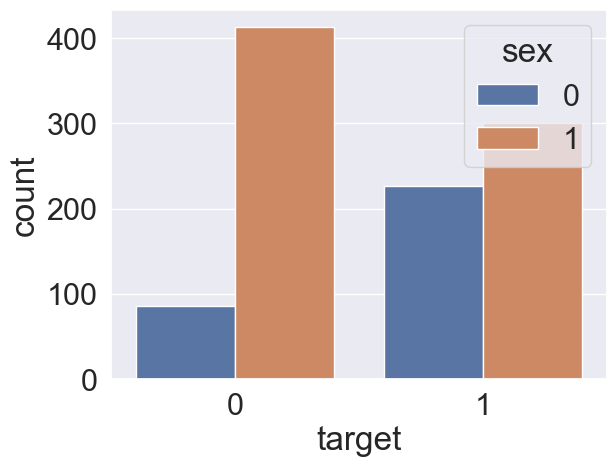

In [40]:
sns.countplot(x = 'target', data = data, hue = 'sex')
plt.show()

C:\Users\Haroon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


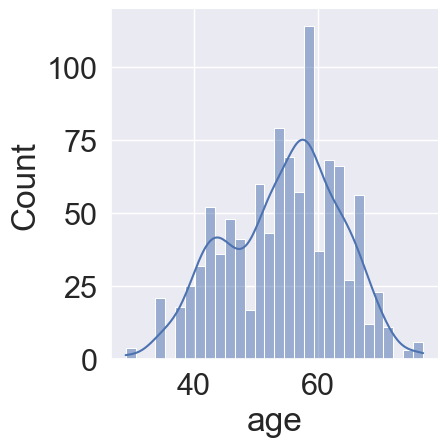

In [41]:
sns.displot(x = 'age', data = data, bins = 30, kde = True)
plt.show()

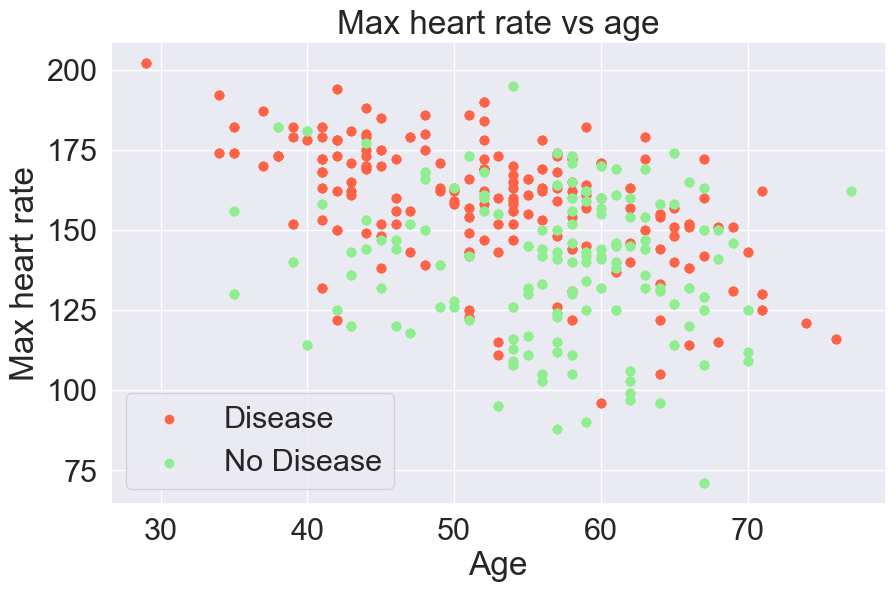

In [43]:
plt.figure(figsize = (10, 6))
plt.scatter(data.age[data.target == 1],
           data.thalach[data.target == 1],
           c = 'tomato')
plt.scatter(data.age[data.target == 0],
           data.thalach[data.target == 0],
           c = 'lightgreen')
plt.title("Max heart rate vs age")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"])
plt.show()

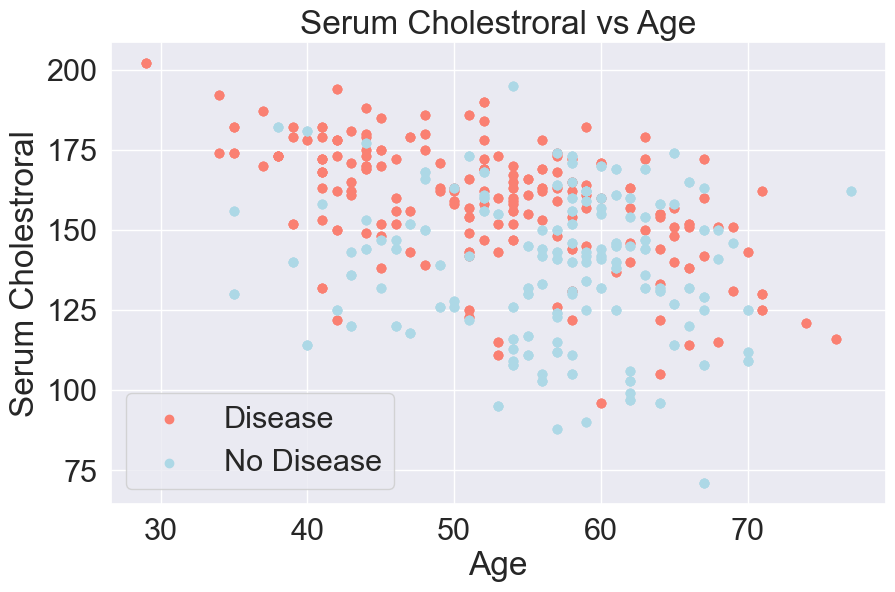

In [45]:
plt.figure(figsize = (10, 6))
plt.scatter(data.age[data.target == 1],
           data.thalach[data.target == 1],
           c = 'salmon')
plt.scatter(data.age[data.target == 0],
           data.thalach[data.target == 0],
           c = 'lightblue')
plt.title("Serum Cholestroral vs Age")
plt.xlabel("Age")
plt.ylabel("Serum Cholestroral")
plt.legend(["Disease", "No Disease"])
plt.show()

C:\Users\Haroon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Haroon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


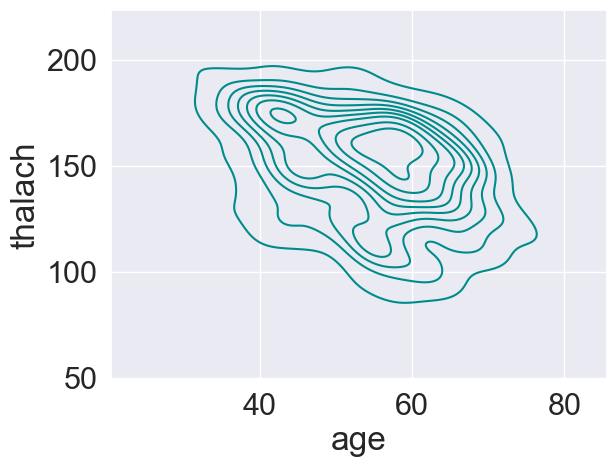

In [46]:
sns.kdeplot(x = 'age', y = 'thalach', data = data, color = 'darkcyan')
plt.show()

[[103   0]
 [  3  99]]


<Axes: >

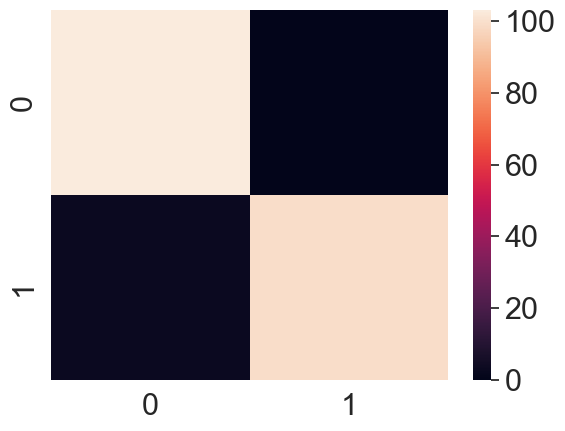

In [62]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("heart.csv")
x = data.drop('target',axis=1)
y = data['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)
from sklearn.tree import DecisionTreeClassifier
DT =  DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
from sklearn.metrics import confusion_matrix as cm
conf = cm(y_test, y_pred)
print(conf)
sns.heatmap(conf)

In [63]:
x = data.drop('target',axis=1)
y = data['target']

In [64]:
print(x.shape)
print(y.shape)

(1025, 13)
(1025,)


In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


In [66]:
# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [67]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Training and evaluation
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(x_train_scaled, y_train)
    y_pred = clf.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {clf_name}: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("="*50)

Training Logistic Regression...
Accuracy of Logistic Regression: 0.85
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       103
           1       0.80      0.93      0.86       102

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

Training Decision Tree...
Accuracy of Decision Tree: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.97      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Training Random Forest...
Accuracy of Random Forest: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       1

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
DT =  DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"Decision tree accuracy score is: {acc}")

Decision tree accuracy score is: 98.53658536585365


In [69]:
input_data = (52,1,0,125,212,0,1,168,0,1,2,2,3)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = DT.predict(input_data_reshape)

print(prediction)


if (prediction[0]==0):
    print("the person does not have a Heart Disease")
else:
        print("the person has Heart Disease")

[0]
the person does not have a Heart Disease


C:\Users\Haroon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
